ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

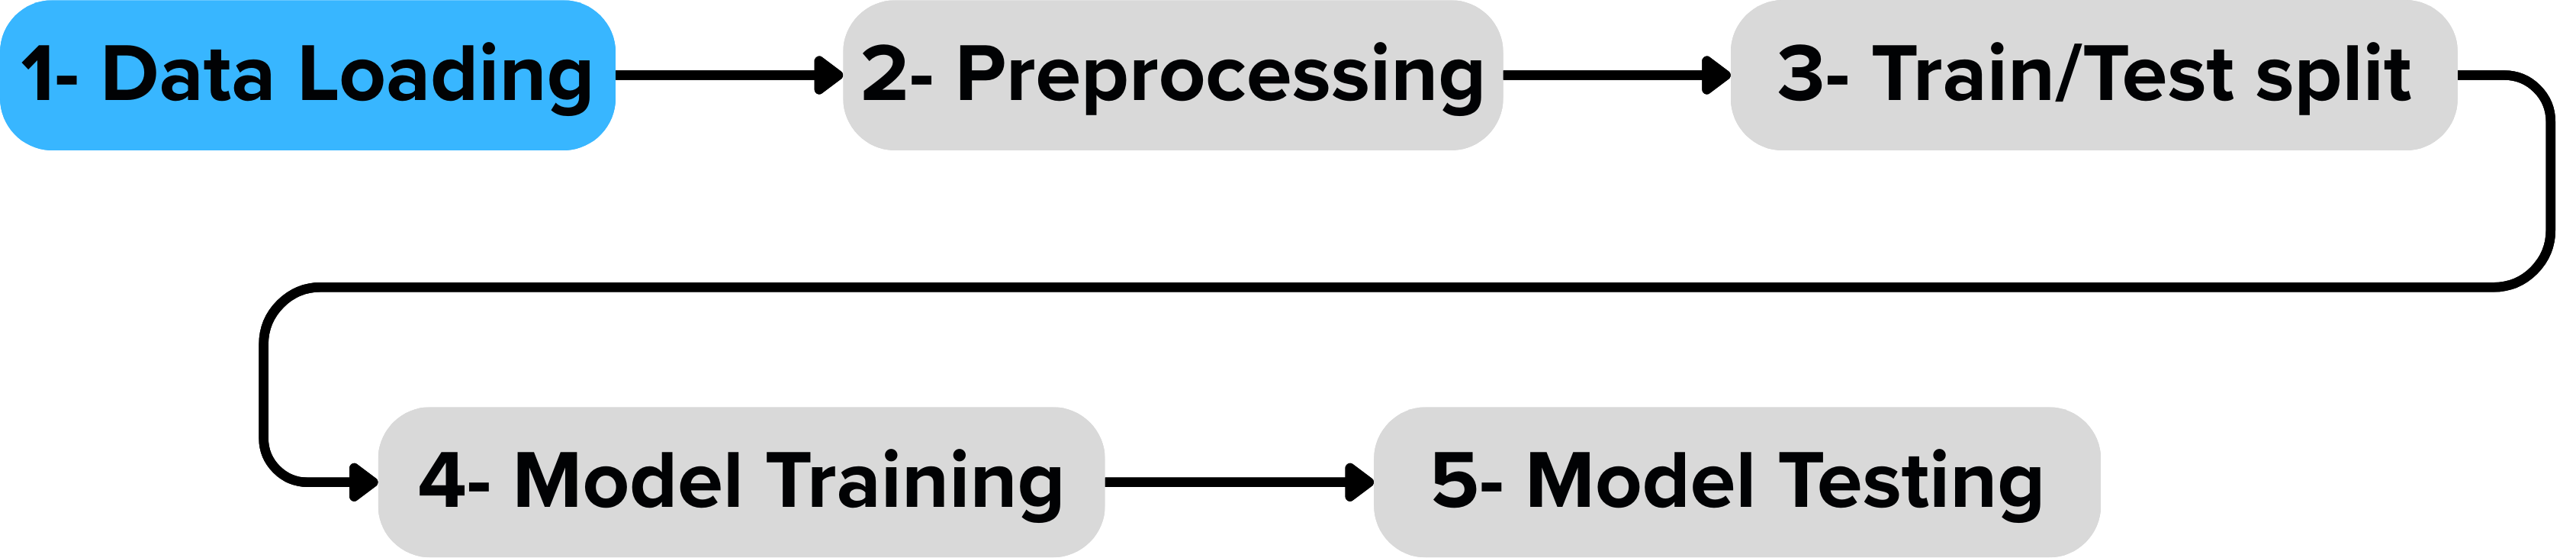

In [7]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [8]:
# Load Dataset

df = pd.read_csv("mobile_data.csv")

# Display first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Check Missing Values

In [9]:
# Check all values
print(df.isna())

      battery_power   blue  clock_speed  dual_sim     fc  four_g  int_memory  \
0             False  False        False     False  False   False       False   
1             False  False        False     False  False   False       False   
2             False  False        False     False  False   False       False   
3             False  False        False     False  False   False       False   
4             False  False        False     False  False   False       False   
...             ...    ...          ...       ...    ...     ...         ...   
1995          False  False        False     False  False   False       False   
1996          False  False        False     False  False   False       False   
1997          False  False        False     False  False   False       False   
1998          False  False        False     False  False   False       False   
1999          False  False        False     False  False   False       False   

      m_dep  mobile_wt  n_cores  ...  p

In [10]:
print(df.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


### Check duplicate rows

In [11]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [15]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (2000, 21) 

number of rows:  2000
number of columns:  21


### Data type of columns

In [14]:
# viewing the data types of columns
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [17]:
# In the mobile dataset, all columns should already be numbers (int or float).
# Let's verify there are no hidden text columns.
print("All columns are numeric. No Date or Currency cleaning is needed for this dataset.")

All columns are numeric. No Date or Currency cleaning is needed for this dataset.


### Descriptive summary Statistics

In [18]:
# Statistical summary
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Distribution of Battery Power

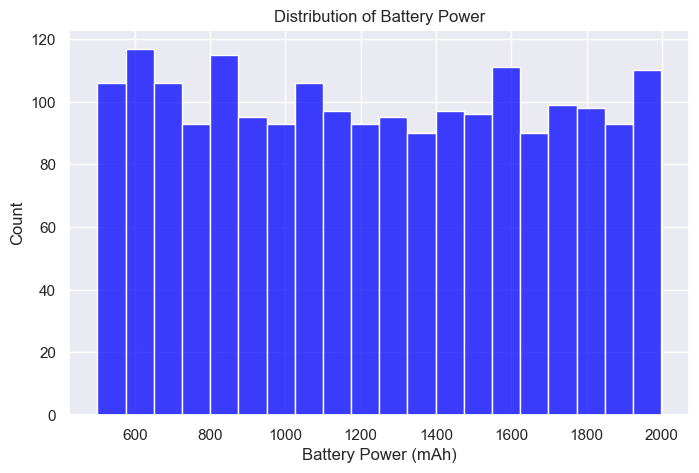

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['battery_power'], bins=20, color='blue')
plt.title("Distribution of Battery Power")
plt.xlabel("Battery Power (mAh)")
plt.show()

- Shows how battery capacities are distributed across the phones.
- Helps identify if the dataset has more small-battery phones or large-battery phones.

### Distribution of RAM

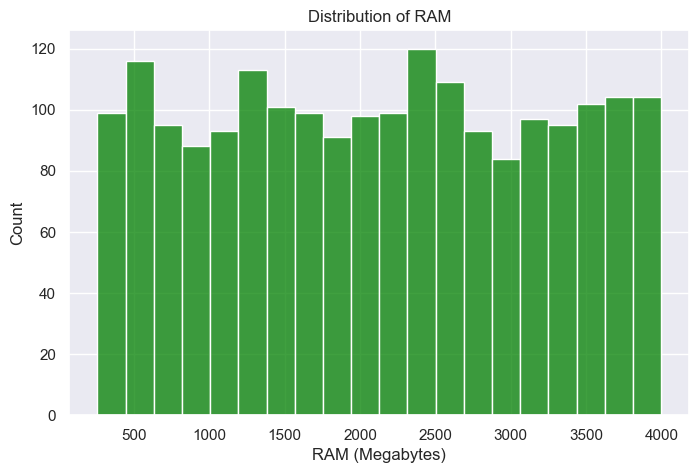

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['ram'], bins=20, color='green')
plt.title("Distribution of RAM")
plt.xlabel("RAM (Megabytes)")
plt.show()

- Shows the distribution of RAM sizes across the dataset.
- Highlights whether most phones have low, medium, or high memory.



### Average RAM per Price Range

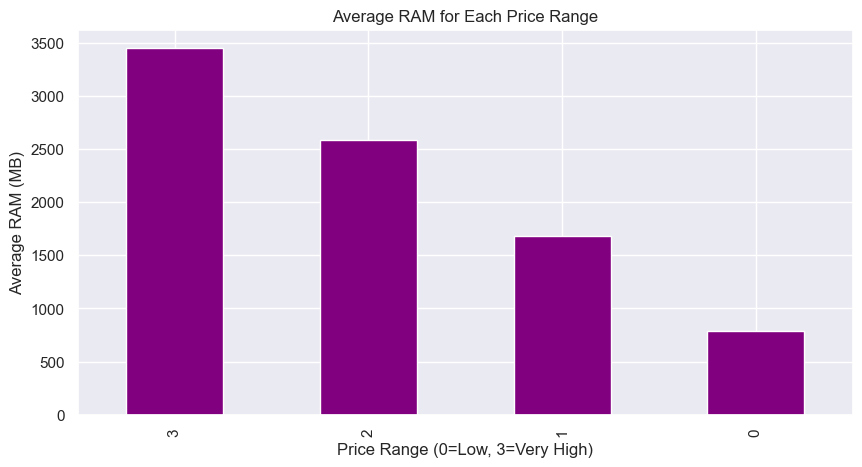

price_range
3    3449.232
2    2582.816
1    1679.490
0     785.314
Name: ram, dtype: float64


In [21]:
# How does RAM change for each price category?
price_ram = df.groupby('price_range')['ram'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
price_ram.plot(kind='bar', color='purple')
plt.title("Average RAM for Each Price Range")
plt.ylabel("Average RAM (MB)")
plt.xlabel("Price Range (0=Low, 3=Very High)")
plt.show()

print(price_ram)

### Average Battery Power per Price Range

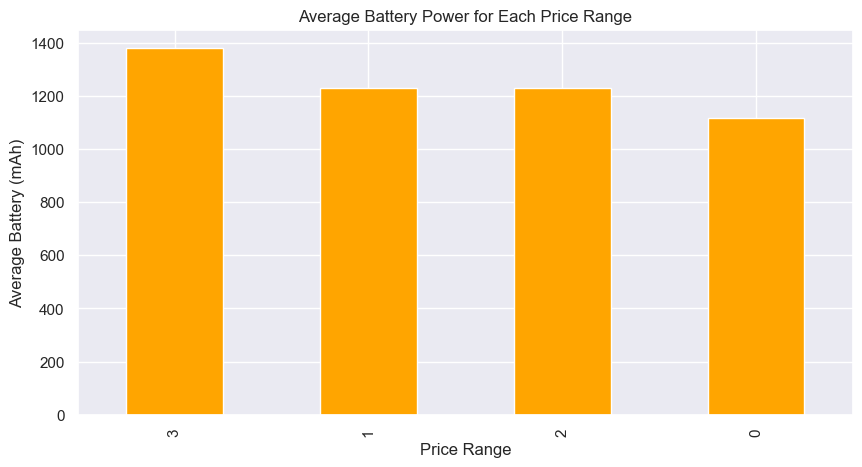

price_range
3    1379.984
1    1228.868
2    1228.320
0    1116.902
Name: battery_power, dtype: float64


In [22]:
price_battery = df.groupby('price_range')['battery_power'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
price_battery.plot(kind='bar', color='orange')
plt.title("Average Battery Power for Each Price Range")
plt.ylabel("Average Battery (mAh)")
plt.xlabel("Price Range")
plt.show()

print(price_battery)

### RAM vs Price Range

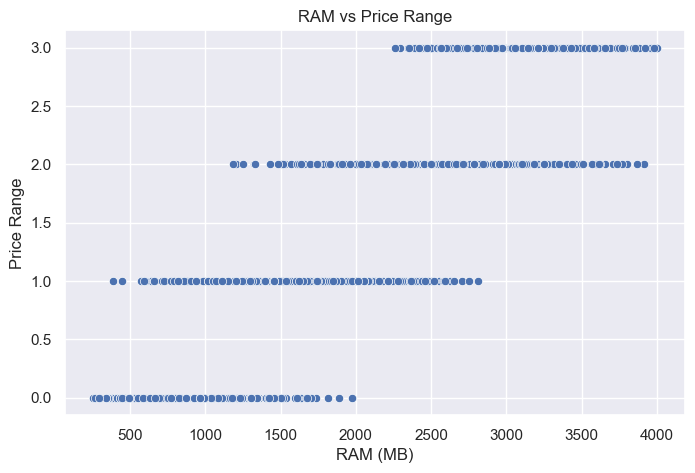

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='ram', y='price_range', data=df)
plt.title("RAM vs Price Range")
plt.xlabel("RAM (MB)")
plt.ylabel("Price Range")
plt.show()

### mobile features correlation

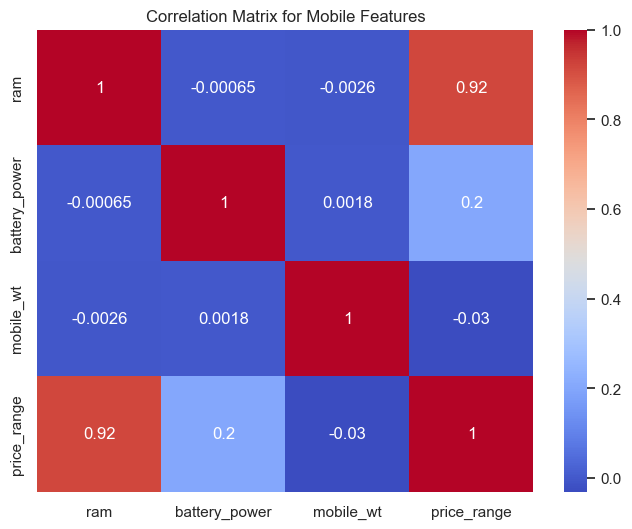

In [24]:
plt.figure(figsize=(8,6))
# Checking correlation between RAM, Battery, Phone Weight, and Price
features_to_check = ['ram', 'battery_power', 'mobile_wt', 'price_range']
sns.heatmap(df[features_to_check].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Mobile Features")
plt.show()


### relationship between Cores and Price

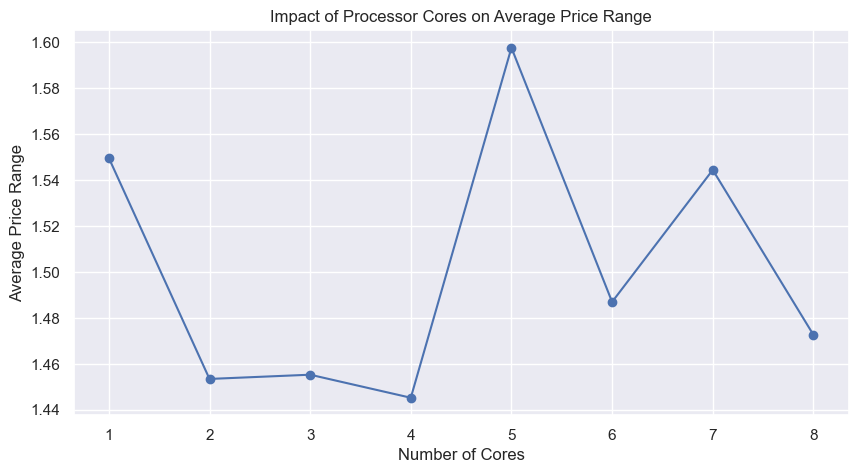

In [25]:
# Since we have no 'Date' column for a time series, let's look at 
# the average price range based on the number of processor cores.
cores_price = df.groupby('n_cores')['price_range'].mean()

plt.figure(figsize=(10,5))
cores_price.plot(marker='o', linestyle='-')
plt.title("Impact of Processor Cores on Average Price Range")
plt.ylabel("Average Price Range")
plt.xlabel("Number of Cores")
plt.grid(True)
plt.show()